In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Overall Sentiment Divergence

In [2]:
df_dk = pd.read_csv("ParlaMint-DK-SENT.csv", delimiter = ",", dtype = object)
df_dk = df_dk[~df_dk["Speaker_party"].isin(["IA", "JF", "SIU", "T", "SP", "NQ", "FG"])]
df_dk = df_dk[df_dk["Speaker_role"]!= "Chairperson"]
df_dk = df_dk.drop(df_dk[(df_dk["Speaker_Minister"] == "-") & (df_dk["Speaker_MP"] == "notMP")].index)

In [3]:
df_dk["Score"] = df_dk["Score"].astype(float)
df_dk["Word_total"] = df_dk["Word_total"].astype(float)
df_dk["Sentiment"] = df_dk["Sentiment"].astype(float)

In [4]:
df_dk.groupby(["Party_status"], dropna = False)["Sentiment"].sum() / df_dk.groupby(["Party_status"], dropna = False)["Word_total"].sum()

Party_status
Coalition     0.031806
Opposition    0.023382
NaN           0.024134
dtype: float64

In [5]:
df_dk["Score"].mean()

0.024986840814007653

In [6]:
status = df_dk.groupby(["Party_status", "Speaker_Minister"], dropna = False)["Sentiment"].sum() / df_dk.groupby(["Party_status", "Speaker_Minister"], dropna = False)["Word_total"].sum()

Text(0.5, 1.0, 'Sentiment by Party Status')

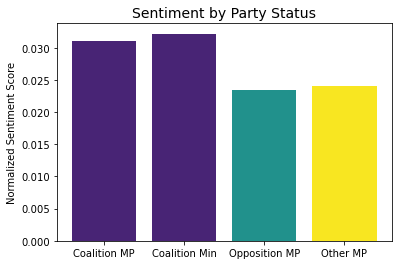

In [7]:
cmap = plt.cm.get_cmap('viridis')


labels = ["Coalition MP", "Coalition Min", "Opposition MP", "Other MP"]
plt.bar(labels, status.to_numpy(), color = [cmap(0.1), cmap(0.1), cmap(0.5), cmap(0.99)])
plt.ylabel("Normalized Sentiment Score")
plt.title("Sentiment by Party Status", fontsize = 14)

In [8]:
df_dk.groupby(["Party_status", "Speaker_party"], dropna = False)["Sentiment"].sum() / df_dk.groupby(["Party_status", "Speaker_party"], dropna = False)["Word_total"].sum()

Party_status  Speaker_party
Coalition     KF               0.029811
              LA               0.031456
              RV               0.033878
              S                0.031388
              V                0.032664
Opposition    ALT              0.026381
              DF               0.019968
              EL               0.019314
              KF               0.026282
              LA               0.020491
              NB               0.018995
              RV               0.025588
              S                0.026736
              SF               0.024294
              V                0.026186
NaN           ALT              0.029016
              DF               0.021891
              EL               0.021793
              KD               0.021590
              KF               0.026687
              LA               0.026206
              RV               0.026701
              SF               0.027947
              UFG              0.027825
dtype: float

## By Status and Gender

In [13]:
statusgender = df_dk.groupby(["Speaker_gender", "Party_status", "Speaker_Minister"], dropna = False)["Sentiment"].sum() / df_dk.groupby(["Speaker_gender", "Party_status", "Speaker_Minister"], dropna = False)["Word_total"].sum()

In [14]:
statusgender

Speaker_gender  Party_status  Speaker_Minister
F               Coalition     -                   0.033959
                              Minister            0.033426
                Opposition    -                   0.024137
                NaN           -                   0.025145
M               Coalition     -                   0.030058
                              Minister            0.031591
                Opposition    -                   0.023001
                NaN           -                   0.023536
dtype: float64

<AxesSubplot:xlabel='Party Status', ylabel='Sentiment Score'>

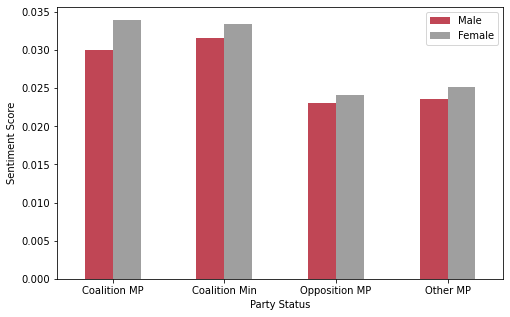

In [133]:
plt.rcParams["figure.figsize"] = (8,5)


test_df = pd.DataFrame({'Party Status': ['Coalition MP', 'Coalition Min', 'Opposition MP', "Other MP"], 
                        'Male': statusgender.to_numpy()[-4:], 'Female': statusgender.to_numpy()[:4]})

# set name as the index and then Transpose the dataframe
test_df = test_df.set_index('Party Status')

#display(test_df)
cmap = plt.get_cmap("RdGy")(np.linspace(0.1, 0.8, 2))

# plot and annotate
test_df.plot(kind='bar', rot=0, ylabel = "Sentiment Score", 
            color = cmap, alpha = 0.8)



### By-Speech Gender and Status

#### Histogram

In [31]:
import numpy as np
from scipy.stats import ttest_ind

v1 = df_dk[df_dk["Party_status"] == "Coalition"]["Score"].to_numpy()
v2 = df_dk[df_dk["Party_status"] == "Opposition"]["Score"].to_numpy()

res = ttest_ind(v1, v2)

print(res)

Ttest_indResult(statistic=51.36061488578711, pvalue=0.0)


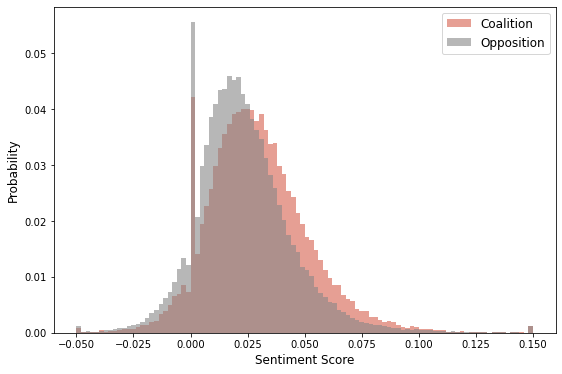

In [137]:
from matplotlib.ticker import PercentFormatter
import seaborn as sns
cmap = plt.get_cmap("RdGy")
fig, ax = plt.subplots()

sns.histplot(np.clip(v1, -0.05, 0.15), stat='probability', bins = 100, kde=False, alpha = 0.6, 
             color = cmap(0.2), edgecolor = None, label = "Coalition")
sns.histplot(np.clip(v2, -0.05, 0.15), stat='probability', bins = 100, kde=False, alpha = 0.6, 
             color = cmap(0.8), edgecolor = None, label = "Opposition")

ax.set_xlabel("Sentiment Score", fontsize = 12)
ax.set_ylabel("Probability", fontsize = 12)


#ax.set_title("Speech Score Histogram", fontsize = 14)
ax.legend(fontsize = 12);
plt.show()




#### Significance tests

In [38]:
df_dk.groupby(["Party_status", "Speaker_Minister", "Speaker_gender"], dropna = False)["Score"].apply(list)

Party_status  Speaker_Minister  Speaker_gender
Coalition     -                 F                 [0.0896559306219239, 0.10658321670287811, 0.09...
                                M                 [0.04041143137636344, 0.027176004266774505, 0....
              Minister          F                 [0.020488505547076482, 0.03675953704815516, 0....
                                M                 [0.041912736217882905, 0.022427205484498842, 0...
Opposition    -                 F                 [0.06876544093825647, 0.040219351246754624, 0....
                                M                 [0.05221502759762253, 0.09895967449972483, 0.0...
NaN           -                 F                 [0.03431448354408886, 0.03339781938853782, 0.0...
                                M                 [0.0927017653429002, 0.03673739854363984, 0.00...
Name: Score, dtype: object

In [39]:
lists = df_dk.groupby(["Party_status","Speaker_Minister", "Speaker_gender"], dropna = False)["Score"].apply(list)

In [40]:
from scipy.stats import ttest_ind

##### Gender differences

In [41]:
#coalition MP
ttest_ind(lists[0], lists[1])

Ttest_indResult(statistic=7.7381330029676105, pvalue=1.0505051959398439e-14)

In [42]:
#coalition Min
ttest_ind(lists[2], lists[3])

Ttest_indResult(statistic=7.277829222089784, pvalue=3.467727291355618e-13)

In [43]:
#opposition
ttest_ind(lists[4], lists[5])

Ttest_indResult(statistic=4.238855194383285, pvalue=2.2489541095966903e-05)

In [44]:
#other
ttest_ind(lists[6], lists[7])

Ttest_indResult(statistic=5.373966105255297, pvalue=7.744931131440395e-08)

###### Party Status Differences

In [45]:
#coalition MP vs Min
ttest_ind(lists[0]+lists[1], lists[2]+lists[3])

Ttest_indResult(statistic=-4.618257349224061, pvalue=3.878361772760541e-06)

In [46]:
#coalition vs oppositoin
ttest_ind(lists[0]+lists[1]+lists[2]+lists[3], lists[4]+lists[5])

Ttest_indResult(statistic=51.360614885787136, pvalue=0.0)

In [47]:
#opposition vs. other
ttest_ind(lists[4]+lists[5], lists[6]+lists[7])

Ttest_indResult(statistic=-4.627877025387087, pvalue=3.6979829579427827e-06)

In [48]:
#coalition vs other
ttest_ind(lists[0]+lists[1]+lists[2]+lists[3], lists[6]+lists[7])

Ttest_indResult(statistic=38.36380756992834, pvalue=0.0)

## Sentiment Divergence over Time

In [49]:
timeseries = (df_dk.groupby(["YearMonth", "Party_status"], dropna = False)["Sentiment"].sum() 
              / df_dk.groupby(["YearMonth", "Party_status"], dropna = False)["Word_total"].sum())

In [50]:
coalition = df_dk[df_dk["Party_status"] == "Coalition"].groupby(["YearMonth"])["Sentiment"].sum() / df_dk[df_dk["Party_status"] == "Coalition"].groupby(["YearMonth"])["Word_total"].sum()
opposition = df_dk[df_dk["Party_status"] == "Opposition"].groupby(["YearMonth"])["Sentiment"].sum() /df_dk[df_dk["Party_status"] == "Opposition"].groupby(["YearMonth"])["Word_total"].sum()
other = df_dk[df_dk["Party_status"].isna()].groupby(["YearMonth"])["Sentiment"].sum() /df_dk[df_dk["Party_status"].isna()].groupby(["YearMonth"])["Word_total"].sum()

In [51]:
coalition.mean(), coalition.std(), coalition.sem(), coalition.autocorr(7)

(0.031647122295008795,
 0.002908155253387001,
 0.00032115202269410853,
 -0.04515335082436165)

In [52]:
opposition.mean(), opposition.std(), opposition.sem(), opposition.autocorr()

(0.02408232672898794,
 0.003898221696729746,
 0.00042788541981729565,
 0.09559013320987701)

In [53]:
other.mean(), other.std(), other.sem(), other.autocorr()

(0.024254809868105284,
 0.003267952378625002,
 0.00036310581984722246,
 0.2883857690163366)

In [54]:
coalition = df_dk[df_dk["Party_status"] == "Coalition"].groupby(["Date"])["Sentiment"].sum() / df_dk[df_dk["Party_status"] == "Coalition"].groupby(["Date"])["Word_total"].sum()
opposition = df_dk[df_dk["Party_status"] == "Opposition"].groupby(["Date"])["Sentiment"].sum() /df_dk[df_dk["Party_status"] == "Opposition"].groupby(["Date"])["Word_total"].sum()
other = df_dk[df_dk["Party_status"].isna()].groupby(["Date"])["Sentiment"].sum() /df_dk[df_dk["Party_status"].isna()].groupby(["Date"])["Word_total"].sum()

In [55]:
coalition.mean(), coalition.std(), coalition.sem(), coalition.autocorr()

(0.03190795684041404,
 0.007052553978158712,
 0.0002450931933936092,
 0.03600512834721464)

In [56]:
opposition.mean(), opposition.std(), opposition.sem(), opposition.autocorr()

(0.023507101461725702,
 0.0058439190485010785,
 0.00020358256669691794,
 0.06581128591472496)

In [57]:
other.mean(), other.std(), other.sem(), other.autocorr()

(0.02397108464004347,
 0.007321835773165252,
 0.00025790066539737726,
 0.043479179418540015)

In [58]:
opposition = df_dk[df_dk["Party_status"] == "Opposition"].groupby(["YearMonth"])["Sentiment"].sum() /df_dk[df_dk["Party_status"] == "Opposition"].groupby(["YearMonth"])["Word_total"].sum()

In [59]:
timeseries

YearMonth  Party_status
2014-10    Coalition       0.035868
           Opposition      0.028531
           NaN             0.030056
2014-11    Coalition       0.034448
           Opposition      0.024958
                             ...   
2022-05    Opposition      0.024391
           NaN             0.025635
2022-06    Coalition       0.033817
           Opposition      0.027604
           NaN             0.031362
Length: 246, dtype: float64

In [60]:
timeseries = timeseries.reset_index().pivot("YearMonth", "Party_status")

In [61]:
timeseries.columns = timeseries.columns.droplevel()

In [62]:
timeseries

Party_status,NaN,Coalition,Opposition
YearMonth,,,
2014-10,0.030056,0.035868,0.028531
2014-11,0.025309,0.034448,0.024958
2014-12,0.024626,0.029907,0.022821
2015-01,0.023125,0.030403,0.023078
2015-02,0.022882,0.032678,0.022772
...,...,...,...
2022-02,0.023717,0.030265,0.024900
2022-03,0.025535,0.030349,0.023917
2022-04,0.026416,0.033296,0.024661


In [63]:
coalition = timeseries["Coalition"].to_numpy()
opposition = timeseries["Opposition"].to_numpy()
other = timeseries[np.nan].to_numpy()

In [64]:
index = timeseries.index

In [65]:
lines = ("2015-05", "2016-11", "2019-06")

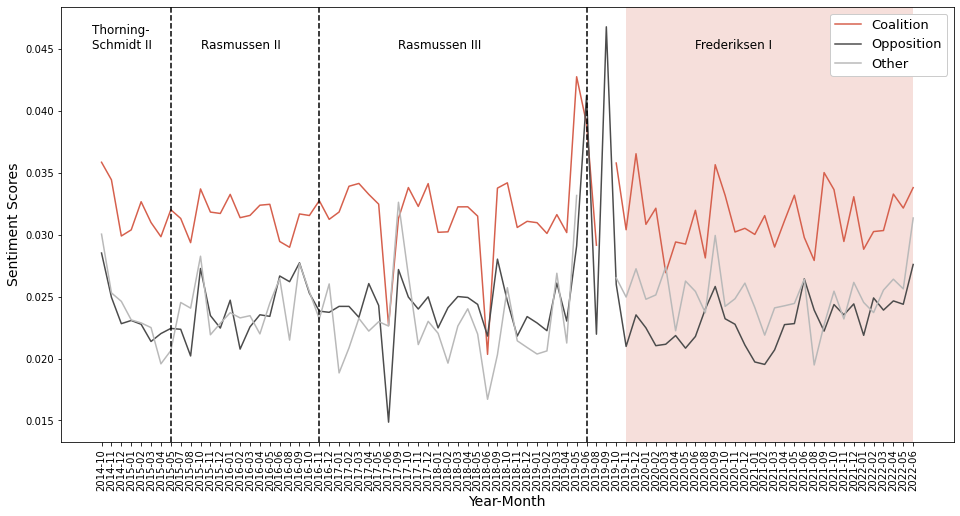

In [106]:
plt.rcParams["figure.figsize"] = (16,8)

plt.plot(index, coalition, label = "Coalition", color = cmap(0.2));
plt.plot(index, opposition, label = "Opposition", color = cmap(0.9));
plt.plot(index, other, label = "Other", color = cmap(0.7))
plt.xticks(rotation=90);
plt.xlabel("Year-Month", fontsize = 14)
plt.ylabel("Sentiment Scores", fontsize = 14)
#plt.title("Sentiment over Time", fontsize = 16)
plt.text(-1,0.045, "Thorning-\nSchmidt II", c = "black", fontsize = 12)
plt.text(10,0.045, "Rasmussen II", c = "black", fontsize = 12)
plt.text(30,0.045, "Rasmussen III", c = "black", fontsize = 12)
plt.text(60,0.045, "Frederiksen I", c = "black", fontsize = 12)
plt.axvspan(53,82, facecolor= cmap(0.2), alpha=0.2, zorder=-1000)


for date in lines:
    x = np.where(index == date)[0][0]
    plt.axvline(x, c = "black", linestyle = "--")
plt.legend(fontsize = 13, loc = "upper right", framealpha = 1);

In [76]:
df_dk.groupby(["Subcorpus", "Party_status"], dropna = False)["Sentiment"].sum() / df_dk.groupby(["Subcorpus", "Party_status"], dropna = False)["Word_total"].sum() 

Subcorpus  Party_status
COVID      Coalition       0.031318
           Opposition      0.022555
           NaN             0.025119
Reference  Coalition       0.032096
           Opposition      0.023848
           NaN             0.023245
dtype: float64

In [66]:
df_dk.groupby(["Subcorpus"])["YearMonth"].unique()[0]

array(['2022-05', '2022-01', '2022-02', '2022-03', '2022-04', '2022-06',
       '2019-12', '2019-11', '2021-05', '2021-11', '2021-12', '2021-08',
       '2021-03', '2021-02', '2021-10', '2021-01', '2021-04', '2021-06',
       '2021-09', '2020-11', '2020-01', '2020-06', '2020-10', '2020-12',
       '2020-05', '2020-03', '2020-02', '2020-09', '2020-04', '2020-08'],
      dtype=object)

### By meeting type

In [110]:
df_dk["Meeting_type"] = pd.Series(dtype='str')

In [111]:
reading = df_dk["Topic_title"].str.contains("behandling")
negotiation = df_dk["Topic_title"].str.contains("forhandling|Forhandling")
question = df_dk["Topic_title"].str.contains("Spm.|spørgetime|Spørgetime")

In [112]:
df_dk["Meeting_type"] = df_dk["Meeting_type"].mask(reading, other = "reading")
df_dk["Meeting_type"] = df_dk["Meeting_type"].mask(negotiation, other = "negotiation")
df_dk["Meeting_type"] = df_dk["Meeting_type"].mask(question, other = "question")

In [113]:
df_dk.groupby(["Meeting_type"], dropna = False)["Sentiment"].sum() / df_dk.groupby(["Meeting_type"], dropna = False)["Word_total"].sum()

Meeting_type
negotiation    0.028280
question       0.025280
reading        0.025752
NaN            0.030707
dtype: float64

In [114]:
df = df_dk.groupby(["Meeting_type", "Party_status"], dropna = False)["Sentiment"].sum() / df_dk.groupby(["Meeting_type", "Party_status"], dropna = False)["Word_total"].sum()

In [115]:
df

Meeting_type  Party_status
negotiation   Coalition       0.034762
              Opposition      0.025284
              NaN             0.025571
question      Coalition       0.029903
              Opposition      0.019595
              NaN             0.018806
reading       Coalition       0.031324
              Opposition      0.023286
              NaN             0.024037
NaN           Coalition       0.039516
              Opposition      0.025032
              NaN             0.025654
dtype: float64

In [116]:
df.to_numpy()[0:8:3] - df.to_numpy()[1:8:3]

array([0.00947813, 0.01030815, 0.00803748])

In [117]:
df_dk["Score"].mean()

0.024986840814007653

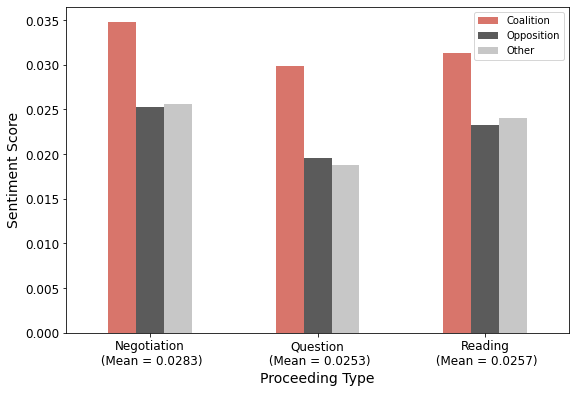

In [138]:
test_df = pd.DataFrame({'Meeting Type': ['Negotiation\n (Mean = 0.0283)', 
                                         'Question\n (Mean = 0.0253)', 'Reading\n (Mean = 0.0257)'], 
                        'Coalition': df.to_numpy()[0:9:3], "Opposition": df.to_numpy()[1:9:3], 
                        "Other": df.to_numpy()[2:9:3]})

# set name as the index and then Transpose the dataframe
test_df = test_df.set_index('Meeting Type')
plt.rcParams["figure.figsize"] = (9,6)



#display(test_df)
cmap = plt.get_cmap("RdGy")
# plot and annotate
test_df.plot(kind='bar', rot=0, color = [cmap(0.18), cmap(0.95), cmap(0.7)], fontsize = 12, alpha = 0.8)
plt.xlabel("Proceeding Type", fontsize = 14)
plt.ylabel("Sentiment Score", fontsize = 14)
#plt.title("Sentiment by Party Status, Meeting Type", fontsize = 14)
plt.show()

